In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import re
import string

In [185]:
train=pd.read_csv(r"C:\Users\User\Documents\tweet train.csv")
test=pd.read_csv(r"C:\Users\User\Documents\tweet test.csv")

In [186]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [187]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [188]:
train.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [189]:
test.isnull().sum()

id       0
tweet    0
dtype: int64

In [190]:
def word_drop(tweet):
    tweet=tweet.lower()
    tweet=re.sub('\[.*?\]','',tweet)
    tweet=re.sub("\\W"," ",tweet)
    tweet=re.sub("https?://\S+|www\.\S+",' ',tweet)
    tweet=re.sub('<.*?>+','',tweet)
    tweet=re.sub('[%s]' %re.escape(string.punctuation),'',tweet)
    tweet=re.sub('\n','',tweet)
    tweet=re.sub('\w*\d\w*','',tweet)
    return tweet

In [191]:
train['tweet']=train['tweet'].apply(word_drop)

In [192]:
train.head(100)

,id,label,tweet
0,1,0,user when a father is dysfunctional and is s...
1,2,0,user user thanks for lyft credit i can t us...
2,3,0,bihday your majesty
3,4,0,model i love u take with u all the time in ...
4,5,0,factsguide society now motivation
...,...,...,...
95,96,0,user i ll always hope that one day i ll get t...
96,97,0,model i love u take with u all the time in ...
97,98,0,couple having sex fat naked japanese girls
98,99,0,hump on that hump day humpersð edwa...


In [193]:
train.shape

(31962, 3)

In [194]:
test.shape

(17197, 2)

In [195]:
train_manual_testing=train.tail(10)
for i in range(31960,31950,-1):
    train.drop([i],axis=0,inplace=True)
test_manual_testing=test.tail(10)
for i in range(17190,17180,-1):
    test.drop([i],axis=0,inplace=True)
        

In [196]:
df_manual_testing=pd.concat([train_manual_testing,test_manual_testing],axis=0)
df_manual_testing.to_csv("manual_testing.csv")

In [197]:
df_merge=pd.concat([train,test],axis=0)
df_merge.head()

,id,label,tweet
0,1,0.0,user when a father is dysfunctional and is s...
1,2,0.0,user user thanks for lyft credit i can t us...
2,3,0.0,bihday your majesty
3,4,0.0,model i love u take with u all the time in ...
4,5,0.0,factsguide society now motivation


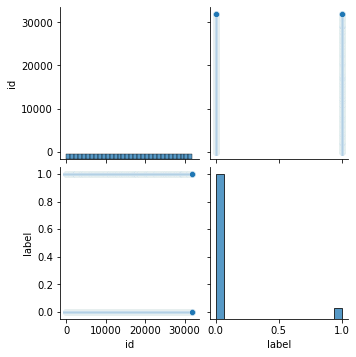

In [198]:
sns.pairplot(train)

In [199]:
X=train["tweet"]
y=train["label"]

In [200]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [201]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [202]:
vectorization= TfidfVectorizer()

In [203]:
XV_train=vectorization.fit_transform(X_train)
XV_test=vectorization.transform(X_test)

In [204]:
from sklearn.linear_model import LogisticRegression

In [205]:
lo=LogisticRegression()

In [206]:
lo.fit(XV_train,y_train)

LogisticRegression()

In [207]:
lo.score(XV_train,y_train)

0.952036305308869

In [208]:
pred_lo=lo.predict(XV_test)
pred_lo

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [209]:
print(classification_report(y_test,pred_lo))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5931
           1       0.93      0.25      0.39       460

    accuracy                           0.94      6391
   macro avg       0.94      0.62      0.68      6391
weighted avg       0.94      0.94      0.93      6391



In [210]:
from sklearn.tree import DecisionTreeClassifier

In [211]:
DT=DecisionTreeClassifier()
DT.fit(XV_train,y_train)

DecisionTreeClassifier()

In [212]:
DT.score(XV_train,y_train)

0.9999217557998513

In [213]:
pred_DT=DT.predict(XV_test)
pred_DT

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [214]:
from sklearn.ensemble import GradientBoostingClassifier

In [215]:
GB=GradientBoostingClassifier()

In [216]:
GB.fit(XV_train,y_train)

GradientBoostingClassifier()

In [217]:
GB.score(XV_train,y_train)

0.951449473807754

In [218]:
pred_GB=GB.predict(XV_test)
pred_GB

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [219]:
from sklearn.ensemble import RandomForestClassifier

In [220]:
RB=RandomForestClassifier()

In [221]:
RB.fit(XV_train,y_train)

RandomForestClassifier()

In [222]:
RB.score(XV_train,y_train)

0.9998435115997026

In [223]:
pred_RB=RB.predict(XV_test)
pred_RB

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [224]:
def output_label(n):
    if n==0:
         return "Positive"
    elif n==1:
         return "Negative"


def manual_testing(tweet):
    testing_tweet={"tweet":[tweet]}    
    new_def_test=pd.DataFrame(testing_tweet)    
    new_def_test["tweet"]=new_def_test["tweet"].apply(word_drop)  
    new_x_test=new_def_test["tweet"]
    new_xv_test=vectorization.transform(new_x_test)
    pred_lo=lo.predict(new_xv_test)
    pred_DT=DT.predict(new_xv_test)
    pred_GB=GB.predict(new_xv_test)
    pred_RB=RB.predict(new_xv_test)

    return print("\n\nlo Prediction \nDT Prediction:{} \nGB Prediction:{} \nRB Prediction:{}".format(output_label(pred_lo),
                                                                                                output_label(pred_DT),
                                                                                                output_label(pred_GB),
                                                                                                output_label(pred_RB)))
               

In [225]:
tweet=str(input())
manual_testing(tweet)

 @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run


lo Prediction 
DT Prediction:Positive 
GB Prediction:Positive 
RB Prediction:Positive
